## Prediction of star ratings using yelp business dataset

For week 3 journal entry, I decided to sift through yelp open dataset https://www.yelp.com/dataset which is cornucopia of business, tips, reviews, checkin, photos and user data about venues in yelp database. My analysis is primarily focused on restaurants in Vegas city. The goal of this work is two fold:

* Use regression technique to predict star ratings using various attributes like whether a restaurant allows its customers to bring their own wine bottles, weather it has free wifi, free parking etc.
* Understand what kind of attributes of a restaurant business encourages customers to give a higher star rating. This information can enable business owners to improve upon the quality of their services and earn higher star ratings.

Numpy,Pandas and Sklearn libraries have been used to perform data preprocessing and predictive modeling tasks.
The performance of the predictive models have been measured using Root Mean Squared Error Metric. 

The data mining steps to prepare the data to be fed into the model, exploratory data analysis, various modeling techniques and parameter tuning - all of these constitute the experience of this project.

### Data Pre-processing

In [1]:
# Import all the libraries
import json
import numpy as np
import pandas as pd

In [2]:
# load the json data into a list and then convert the list into a pandas dataframe
business =[]
with open('business.json','r') as file:
    for line in file:
        business.append(json.loads(line))
business=pd.DataFrame(business) 

In [3]:
# Let's make a copy of the data and take a look at the first couple rows
df = business.copy()
df.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{u'RestaurantsPriceRange2': 2, u'BusinessParki...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{u'Monday': u'10:00-21:00', u'Tuesday': u'10:0...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{u'GoodForMeal': {u'dessert': False, u'latenig...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{u'Monday': u'10:00-22:00', u'Tuesday': u'10:0...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{u'BusinessParking': {u'garage': False, u'stre...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{u'Monday': u'10:00-19:00', u'Tuesday': u'10:0...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON
3,"7702 E Doubletree Ranch Rd, Ste 300",{},CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,"{u'Tuesday': u'9:00-17:00', u'Friday': u'9:00-...",1,33.565082,-111.916400,TRUmatch,,85258,3,3.0,AZ
4,4719 N 20Th St,"{u'GoodForMeal': {u'dessert': False, u'latenig...",duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,{},0,33.505928,-112.038847,Blimpie,,85016,10,4.5,AZ


In [4]:
# Let's check the data types, no. of observations, no. of columns and nullable columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156639 entries, 0 to 156638
Data columns (total 15 columns):
address         156639 non-null object
attributes      156639 non-null object
business_id     156639 non-null object
categories      156639 non-null object
city            156639 non-null object
hours           156639 non-null object
is_open         156639 non-null int64
latitude        156638 non-null float64
longitude       156638 non-null float64
name            156639 non-null object
neighborhood    156639 non-null object
postal_code     156639 non-null object
review_count    156639 non-null int64
stars           156639 non-null float64
state           156639 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 17.9+ MB


Let's check out the major cities that are covered in this dataset.

In [5]:
#What are the cities that are covered here
city_data=df['city'].value_counts()

print city_data
city_data = city_data[city_data.values>=300]


Las Vegas                     24768
Phoenix                       15656
Toronto                       15483
Charlotte                      7557
Scottsdale                     7510
Pittsburgh                     5688
Montréal                       5175
Mesa                           5146
Henderson                      4130
Tempe                          3949
Chandler                       3649
Edinburgh                      3625
Cleveland                      2979
Madison                        2891
Glendale                       2841
Gilbert                        2835
Mississauga                    2316
Stuttgart                      1975
Peoria                         1527
Markham                        1390
North Las Vegas                1254
Champaign                      1084
North York                      944
Surprise                        934
Scarborough                     870
Richmond Hill                   770
Concord                         726
Goodyear                    

In [6]:
# Using plotly for exploratory data visualization
from plotly import __version__
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.graph_objs import Scatter, Figure, Layout
init_notebook_mode(connected=True)


city_data = city_data[city_data.values>=500]

# Let's take a look at how many businesses are covered from different cities
citydata = [go.Bar(
            x=city_data.index,
            y=city_data.values
    )]

layout = go.Layout(
    xaxis=dict(
        title='Cities'  
       
    ),
    yaxis=dict(
        title='No. of Venues'
            )
)
fig = go.Figure(data=citydata, layout=layout)
py.iplot(fig, filename='basic-bar')

Yelp business database has the highest no. of venues from Vegas city. So, I will be focusing my analysis on Las Vegas. Let's cull the data for the same.

In [7]:
# Let's focus on vegas city
df=df[df['city'] == 'Las Vegas']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24768 entries, 10 to 156635
Data columns (total 15 columns):
address         24768 non-null object
attributes      24768 non-null object
business_id     24768 non-null object
categories      24768 non-null object
city            24768 non-null object
hours           24768 non-null object
is_open         24768 non-null int64
latitude        24768 non-null float64
longitude       24768 non-null float64
name            24768 non-null object
neighborhood    24768 non-null object
postal_code     24768 non-null object
review_count    24768 non-null int64
stars           24768 non-null float64
state           24768 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 3.0+ MB


No null values are observed from the above information table.

In [9]:
# Lets start with categories column which represents the business type of a business venue.
df.categories.head(8)

10                               [Bowling, Active Life]
19          [Financial Services, Banks & Credit Unions]
39    [Massage, Beauty & Spas, Reflexology, Health &...
40    [Auto Insurance, Body Shops, Auto Repair, Insu...
48          [Financial Services, Banks & Credit Unions]
58    [Restaurants, American (Traditional), Mexican,...
64                               [Mexican, Restaurants]
75                   [Local Services, Shipping Centers]
Name: categories, dtype: object

The categories column contains the list of business categories as string values. Let's create dummy variables to one hot encode them so that later we can extract data for a particular category and use it for predictive modeling.

In [10]:
# Categories column in dataset is in the form of a list. So, let's create dummy variable to one hot encode them
df['BusinessTypes'] = map(lambda x: '|'.join(x), df['categories'])
BusinessTypes_df = df.BusinessTypes.str.get_dummies(sep='|')

# merging the original dataset with one hot encoded category data
df = df.merge(BusinessTypes_df, left_index=True, right_index=True)
# remove intermediate columns (no longer needed)
df.drop(['categories', 'BusinessTypes'], axis=1, inplace=True)
df.head(3)

,address,attributes,business_id,city,hours,is_open,latitude,longitude,name,neighborhood,...,Wine Tasting Room,Wine Tours,Wineries,Women's Clothing,Workers Compensation Law,Wraps,Yelp Events,Yoga,Ziplining,Zoos
10,11022 W Charleston Blvd,"{u'BusinessAcceptsCreditCards': True, u'GoodFo...",N9BN9ldVl1FNzcB9_eAstw,Las Vegas,{},1,36.159098,-115.337915,Red Rock Bowling UYE Part 2,Summerlin,...,0,0,0,0,0,0,0,0,0,0
19,2385 E Windmill Ln,{},BmSJ6C7Y9s3tHotRetVbmA,Las Vegas,"{u'Monday': u'10:00-19:00', u'Tuesday': u'10:0...",1,36.040413,-115.119104,U.S. Bank,Southeast,...,0,0,0,0,0,0,0,0,0,0
39,6162 W Flamingo Rd,"{u'BusinessParking': {u'garage': False, u'stre...",xmY0pzNvZKEzuN0XEqeV5w,Las Vegas,"{u'Monday': u'10:00-0:00', u'Tuesday': u'10:00...",1,36.115465,-115.226764,QQ Foot Spa,,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Moving on to the attributes column.
df['attributes'].head(10)

10    {u'BusinessAcceptsCreditCards': True, u'GoodFo...
19                                                   {}
39    {u'BusinessParking': {u'garage': False, u'stre...
40                {u'BusinessAcceptsCreditCards': True}
48                                                   {}
58    {u'GoodForMeal': {u'dessert': False, u'latenig...
64    {u'RestaurantsPriceRange2': 1, u'RestaurantsAt...
75                {u'BusinessAcceptsCreditCards': True}
88    {u'BusinessParking': {u'garage': False, u'stre...
90    {u'BusinessAcceptsCreditCards': True, u'Restau...
Name: attributes, dtype: object

The attributes column is in the form of nested dictionary. Let's parse this column to extract the attributes of the business venues.

In [12]:
# We will need to flatten the attributes column which is in the form of nest dictionary and one hot encode them as well.
df=df.join(pd.DataFrame(df['attributes'].to_dict()).T)

# Find the nested attributes that need to be split further into seperate columns
splitCols = []
for col in df.columns:
    for val in df[col].values:
        if type(val) == dict:
            splitCols.append(col)
            break
            

print splitCols

# Splitting the nested attributes and merging them in the original dataframe
for toSplit in splitCols:
    new_df = pd.DataFrame(df[toSplit].to_dict()).T
    new_df.columns = [toSplit + '_' + str(col) for col in new_df.columns]
    df = df.join(new_df)

# dropping the original columns
df.drop(['attributes'] + splitCols, axis=1, inplace=True)
df.head()

[u'attributes', u'hours', u'Ambience', u'BestNights', u'BusinessParking', u'DietaryRestrictions', u'GoodForMeal', u'HairSpecializesIn', u'Music']


,address,business_id,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,...,HairSpecializesIn_kids,HairSpecializesIn_perms,HairSpecializesIn_straightperms,Music_background_music,Music_dj,Music_jukebox,Music_karaoke,Music_live,Music_no_music,Music_video
10,11022 W Charleston Blvd,N9BN9ldVl1FNzcB9_eAstw,Las Vegas,1,36.159098,-115.337915,Red Rock Bowling UYE Part 2,Summerlin,89135,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2385 E Windmill Ln,BmSJ6C7Y9s3tHotRetVbmA,Las Vegas,1,36.040413,-115.119104,U.S. Bank,Southeast,89123,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,6162 W Flamingo Rd,xmY0pzNvZKEzuN0XEqeV5w,Las Vegas,1,36.115465,-115.226764,QQ Foot Spa,,89103,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,4755 W Flamingo Rd,aj1C0D7hniEPpsTidbCQIg,Las Vegas,1,36.115074,-115.205600,Express Collision Center,,89103,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,9410 W Lake Mead Blvd,45arahaS6jTtYBw_STLDXg,Las Vegas,1,36.206763,-115.300723,Wells Fargo Bank,Summerlin,89134,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


While most of the columns that we extracted from the original attributes column are boolean values. But there are a few that contain string values. Let's one hot encode to make them usable for modeling purpose.

In [14]:
# finding the columns that still have string values
categoricalType =[]
for cols in df.columns:
    for c in df[cols].values:
        if type(c)== unicode:
            categoricalType.append(cols)
            
categoricalTypeCols = set(categoricalType)
categoricalTypeCols

{u'AgesAllowed',
 u'Alcohol',
 u'BYOBCorkage',
 u'NoiseLevel',
 u'RestaurantsAttire',
 u'Smoking',
 u'WiFi',
 u'address',
 u'attributes_AgesAllowed',
 u'attributes_Alcohol',
 u'attributes_BYOBCorkage',
 u'attributes_NoiseLevel',
 u'attributes_RestaurantsAttire',
 u'attributes_Smoking',
 u'attributes_WiFi',
 u'business_id',
 u'city',
 u'hours_Friday',
 u'hours_Monday',
 u'hours_Saturday',
 u'hours_Sunday',
 u'hours_Thursday',
 u'hours_Tuesday',
 u'hours_Wednesday',
 u'name',
 u'neighborhood',
 u'postal_code',
 u'state'}

In [15]:
# Creating dummy variables for the columns that still have string values
catCols = ['AgesAllowed','Alcohol','BYOBCorkage','NoiseLevel','RestaurantsAttire','Smoking','WiFi']
new_cat = pd.concat([pd.get_dummies(df[col], prefix=col, prefix_sep='_') for col in catCols], axis=1)

df = pd.concat([df, new_cat], axis=1)
df.drop(catCols, inplace=True, axis=1)
df.head()

,address,business_id,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,...,NoiseLevel_very_loud,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,Smoking_no,Smoking_outdoor,Smoking_yes,WiFi_free,WiFi_no,WiFi_paid
10,11022 W Charleston Blvd,N9BN9ldVl1FNzcB9_eAstw,Las Vegas,1,36.159098,-115.337915,Red Rock Bowling UYE Part 2,Summerlin,89135,13,...,0,0,0,0,0,0,0,0,0,0
19,2385 E Windmill Ln,BmSJ6C7Y9s3tHotRetVbmA,Las Vegas,1,36.040413,-115.119104,U.S. Bank,Southeast,89123,3,...,0,0,0,0,0,0,0,0,0,0
39,6162 W Flamingo Rd,xmY0pzNvZKEzuN0XEqeV5w,Las Vegas,1,36.115465,-115.226764,QQ Foot Spa,,89103,20,...,0,0,0,0,0,0,0,0,0,0
40,4755 W Flamingo Rd,aj1C0D7hniEPpsTidbCQIg,Las Vegas,1,36.115074,-115.205600,Express Collision Center,,89103,54,...,0,0,0,0,0,0,0,0,0,0
48,9410 W Lake Mead Blvd,45arahaS6jTtYBw_STLDXg,Las Vegas,1,36.206763,-115.300723,Wells Fargo Bank,Summerlin,89134,4,...,0,0,0,0,0,0,0,0,0,0


Lot of missing values have been generated during the dummy variable creation process. Let's fill the missing values by 0.5. Also, there are some columns that contain boolean values that should be converted to numeric values too.

In [16]:
# Taking care of columns that still have non numeric boolean values. Also filling the missing values with 0.5
print df['BusinessAcceptsCreditCards'].head(10)
df = df.fillna(0.5).apply(pd.to_numeric, errors='ignore')  
print df['BusinessAcceptsCreditCards'].head(10)

10    True
19     NaN
39    True
40    True
48     NaN
58    True
64     NaN
75    True
88    True
90    True
Name: BusinessAcceptsCreditCards, dtype: object
10    1.0
19    0.5
39    1.0
40    1.0
48    0.5
58    1.0
64    0.5
75    1.0
88    1.0
90    1.0
Name: BusinessAcceptsCreditCards, dtype: float64


In [17]:
# check that all nulls are removed
df.isnull().sum().sum()

120L

In [378]:
# check missing values
def check_nan(list_values):
    return sum(list_values.isnull())

#Using apply function to check missing values on every column of dataframe
print df.apply(check_nan)

address                              0
business_id                          0
city                                 0
is_open                              0
latitude                             0
longitude                            0
name                                 0
neighborhood                         0
postal_code                        120
review_count                         0
stars                                0
state                                0
& Probates                           0
ATV Rentals/Tours                    0
Acai Bowls                           0
Accessories                          0
Accountants                          0
Acne Treatment                       0
Active Life                          0
Acupuncture                          0
Adult                                0
Adult Education                      0
Adult Entertainment                  0
Advertising                          0
Aerial Fitness                       0
Aerial Tours             

Postal code still has missing values. Let's replace them by 0.

In [18]:
# check again for missing values. 
print df['postal_code'].isnull().sum()

# filling up missing postal codes with 0
df['postal_code'] = df['postal_code'].fillna(0)
print df['postal_code'].isnull().sum()

120
0


In [19]:
# check that all nulls are removed
print df.isnull().sum().sum()

0


The whole data set can be divided into basic columns, business type columns and attribute columns. Attribute columns
represent the features of different business venues.

In [20]:
basicColumns = df.columns[0:12]
print "Basic Columns :", basicColumns

categoryColumns = df.columns[12:1078]
print "Business Type Columns :", categoryColumns

attributeColumns = df.columns[1078:1220]
print "Business Attribute Columns :", attributeColumns

Basic Columns : Index([u'address', u'business_id', u'city', u'is_open', u'latitude',
       u'longitude', u'name', u'neighborhood', u'postal_code', u'review_count',
       u'stars', u'state'],
      dtype='object')
Business Type Columns : Index([u'& Probates', u'ATV Rentals/Tours', u'Acai Bowls', u'Accessories',
       u'Accountants', u'Acne Treatment', u'Active Life', u'Acupuncture',
       u'Adult', u'Adult Education',
       ...
       u'Wine Tasting Room', u'Wine Tours', u'Wineries', u'Women's Clothing',
       u'Workers Compensation Law', u'Wraps', u'Yelp Events', u'Yoga',
       u'Ziplining', u'Zoos'],
      dtype='object', length=1066)
Business Attribute Columns : Index([u'AcceptsInsurance', u'BYOB', u'BikeParking', u'BusinessAcceptsBitcoin',
       u'BusinessAcceptsCreditCards', u'ByAppointmentOnly', u'Caters',
       u'CoatCheck', u'Corkage', u'DogsAllowed',
       ...
       u'NoiseLevel_very_loud', u'RestaurantsAttire_casual',
       u'RestaurantsAttire_dressy', u'Restaurant

Some columns culled from original attribute column are duplicates. So, let's remove them to avoid redundancy.

In [21]:
# Removing columns to avoid redundancy

toRemove = ['hours_Friday','hours_Monday','hours_Saturday','hours_Sunday','hours_Thursday','hours_Tuesday','hours_Wednesday'
            ,'attributes_AcceptsInsurance','attributes_AgesAllowed','attributes_Alcohol','attributes_Ambience',
            'attributes_BYOB','attributes_BYOBCorkage','attributes_BestNights','attributes_BikeParking','attributes_BusinessAcceptsBitcoin',
'attributes_BusinessAcceptsCreditCards','attributes_BusinessParking','attributes_ByAppointmentOnly','attributes_Caters',
'attributes_CoatCheck','attributes_Corkage','attributes_DietaryRestrictions','attributes_DogsAllowed','attributes_DriveThru',
'attributes_GoodForDancing','attributes_GoodForKids''attributes_GoodForMeal','attributes_HairSpecializesIn','attributes_HappyHour',
'attributes_HasTV','attributes_Music','attributes_NoiseLevel','attributes_Open24Hours','attributes_OutdoorSeating',
'attributes_RestaurantsAttire','attributes_RestaurantsCounterService','attributes_RestaurantsDelivery','attributes_RestaurantsGoodForGroups','attributes_RestaurantsPriceRange2',
'attributes_RestaurantsReservations','attributes_RestaurantsTableService','attributes_RestaurantsTakeOut','attributes_Smoking','attributes_WheelchairAccessible',
'attributes_WiFi', 'attributes_GoodForKids','attributes_GoodForMeal','BYOB','Corkage']

FinalattColumns = [cols for cols in attributeColumns if cols not in toRemove]
FinalattColumns

[u'AcceptsInsurance',
 u'BikeParking',
 u'BusinessAcceptsBitcoin',
 u'BusinessAcceptsCreditCards',
 u'ByAppointmentOnly',
 u'Caters',
 u'CoatCheck',
 u'DogsAllowed',
 u'DriveThru',
 u'GoodForDancing',
 u'GoodForKids',
 u'HappyHour',
 u'HasTV',
 u'Open24Hours',
 u'OutdoorSeating',
 u'RestaurantsCounterService',
 u'RestaurantsDelivery',
 u'RestaurantsGoodForGroups',
 u'RestaurantsPriceRange2',
 u'RestaurantsReservations',
 u'RestaurantsTableService',
 u'RestaurantsTakeOut',
 u'WheelchairAccessible',
 u'Ambience_casual',
 u'Ambience_classy',
 u'Ambience_divey',
 u'Ambience_hipster',
 u'Ambience_intimate',
 u'Ambience_romantic',
 u'Ambience_touristy',
 u'Ambience_trendy',
 u'Ambience_upscale',
 u'BestNights_friday',
 u'BestNights_monday',
 u'BestNights_saturday',
 u'BestNights_sunday',
 u'BestNights_thursday',
 u'BestNights_tuesday',
 u'BestNights_wednesday',
 u'BusinessParking_garage',
 u'BusinessParking_lot',
 u'BusinessParking_street',
 u'BusinessParking_valet',
 u'BusinessParking_valid

### Exploratory Data Analysis

In [22]:
# Let's check which type of business venue has the highest no. of observations.
df[categoryColumns].sum().sort_values(ascending=False)

Restaurants                  5682
Shopping                     4176
Food                         2733
Beauty & Spas                2731
Home Services                2717
Health & Medical             2405
Local Services               1836
Nightlife                    1776
Automotive                   1714
Event Planning & Services    1458
Bars                         1311
Arts & Entertainment         1273
Fashion                      1272
Active Life                  1198
Professional Services        1078
Hotels & Travel               956
Hair Salons                   911
Real Estate                   908
Doctors                       901
Fast Food                     847
American (Traditional)        739
Mexican                       724
Auto Repair                   700
Home & Garden                 626
Sandwiches                    621
Nail Salons                   616
Pizza                         587
Financial Services            577
American (New)                555
Fitness & Inst

In [23]:
# Plotting to check which type of business venue has the highest no. of observations.
catdata = [go.Bar(
            x=df[categoryColumns].sum().sort_values(ascending=False).head(15).index,
            y=df[categoryColumns].sum().sort_values(ascending=False).head(15).values
    )]

layout = go.Layout(
    xaxis=dict(
        title='businessType'  
       
    ),
    yaxis=dict(
        title='No.of Venues'
            )
)
fig = go.Figure(data=catdata, layout=layout)
py.iplot(fig, filename='basic-bar')

Restaurants have the highest no. of observations in the dataset. Let's focus on restaurants business type for predicting their star ratings.

But before jumping into the machine learning part I am curious to look at the average ratings of the highest and lowest rated business categories that have minimum of 10 entries.

In [24]:
# Plot to visualize average star ratings for highest and lowest rated business categories.
minRatings = 10
cats = categoryColumns.values 
upper_perc = np.percentile(df['stars'], 75) # 75 percentile for upper bound
lower_perc = np.percentile(df['stars'], 25) # 25 percentile for lower bound
names = []
avg = []

for cat in cats:
    if df[df[cat] == 1].stars.value_counts().sum() >= minRatings:
        avgRating = df[df[cat] == 1].stars.mean()
        if avgRating >= upper_perc or avgRating <= lower_perc: # Check if the business type is either highest rated or lowest rated
            names.append(cat)
            avg.append(df[df[cat] == 1].stars.mean())
            
businessdata = pd.DataFrame({'AvgRating':avg, 'BusinessType':names})
businessdata.sort_values(by='AvgRating',ascending=True,inplace=True)

bdata = [go.Bar(
            y=businessdata.AvgRating.values,
            x=businessdata.BusinessType.values,
            
)]

py.iplot(bdata, filename='h-bar')

Looks like utilities, airlines, psychiatrists are lowest rated business categories. Refinishing services,gyms, meditation centers etc are highly rated venues.

Is the business star rating affected by free wifi? Doesn't look like...

In [29]:
# Plot to visualize the distribution of star ratings for WIFI attribute.

trace0 = go.Box(
    y=df.loc[df['WiFi_free']==1,]['stars'].values,
    name = 'WiFi_Free:Yes',
    marker = dict(
        color = 'rgb(214, 0, 140)',
    )
)
trace1 = go.Box(
    y=df.loc[df['WiFi_free']==0,]['stars'].values,
    name = 'WiFi_Free:No',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
boxdata = [trace0, trace1]
py.iplot(boxdata)

How about BYOBCorkage? Is the rating affected by the fact that the business allows BYOB and does not charge customers for it.

In [30]:
# Plot to visualize the distribution of star ratings for BYOB Corkage attribute
trace2 = go.Box(
    y=df.loc[df['BYOBCorkage_yes_free']==1,]['stars'].values,
    name = 'BYOBCorkage_Free:Yes',
    marker = dict(
        color = 'rgb(128, 0, 128)',
    )
)
trace3 = go.Box(
    y=df.loc[df['BYOBCorkage_yes_free']==0,]['stars'].values,
    name = 'BYOBCorkage_Free:No',
    marker = dict(
        color = 'rgb(0, 128, 255)',
    )
)
boxdata1 = [trace2, trace3]
py.iplot(boxdata1)

The star rating distribution in the context of BYOB Corkage does not seem very intuitive. I assume,it must be different set of attributes for different business categories that contribute to a good rating.

So, let's finally focus on restaurant business and figure out what features contribute to a good star rating.

### Prediction of star ratings for restaurants 

What business attributes predict good ratings for restaurants? Let's cull the data for restaurants and move on to the  regression task.

In [389]:
from sklearn.model_selection import train_test_split

# Subsetting the original data for restaurant business types
rdf = df[df['Restaurants']==1]

# Chosing all the attribute columns for modeling
mdf = rdf[FinalattColumns]
mdf['is_open'] = rdf['is_open']

# Assigning the features and label values
X = mdf
y = rdf['stars']
feature_cols = mdf.columns

# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)
print "shape of training data :", X_train.shape, y_train.shape
print "shape of testing data :", X_test.shape, y_test.shape

shape of training data : (5113, 95) (5113,)
shape of testing data : (569, 95) (569,)


/Users/Shruti/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [391]:
# Importing the regression libraries
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

In [394]:
# Fitting the first linear regression model and calculating the training and testing RMSE
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
print 'Training RMSE:'
print np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))

y_pred_test = lr.predict(X_test)
print 'Testing RMSE:'
print np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print ''

# Checking out the intercept and regression coefficient values
print "Intercept :", lr.intercept_
result = pd.DataFrame({'Features': feature_cols, 'Coefficients': lr.coef_})
print result.sort_values(by=['Coefficients'], ascending=False)


Training RMSE:
0.714995985774
Testing RMSE:
0.720440738943

Intercept : -8.13927189332e+12
    Coefficients                           Features
64  1.022465e+13    HairSpecializesIn_straightperms
62  2.109441e+12             HairSpecializesIn_kids
59  2.102226e+12         HairSpecializesIn_coloring
60  2.090630e+12            HairSpecializesIn_curly
58  2.080803e+12            HairSpecializesIn_asian
61  2.040259e+12       HairSpecializesIn_extensions
46  3.411096e+11          DietaryRestrictions_halal
44  1.046292e+00     DietaryRestrictions_dairy-free
87  5.750491e-01           RestaurantsAttire_formal
68  3.230684e-01                      Music_karaoke
30  2.661543e-01                    Ambience_trendy
83  2.177769e-01                   NoiseLevel_quiet
24  2.170411e-01                    Ambience_classy
78  1.942903e-01                     BYOBCorkage_no
52  1.854370e-01                 GoodForMeal_brunch
17  1.721951e-01           RestaurantsGoodForGroups
5   1.658788e-01         

Such big regression estimates.This does not look realistic at all.Let's use k-fold cross validation to get a better sense of the RMSE values.

In [401]:
# 10 fold cross valiadtion 
lr = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
cross_val_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=kfold)
print '10-fold RMSEs:'
print [np.sqrt(-x) for x in cross_val_scores]
#print "\n"
print 'Mean of Cross Validated RMSE:'
print np.sqrt(-np.mean(cross_val_scores))  # RMSE is the sqrt of the avg of MSEs
#print "\n"
print 'Std of Cross Validated RMSE:'
print np.std(cross_val_scores)

10-fold RMSEs:
[0.71938558298865707, 0.7463462492954942, 0.73831174420628787, 339893150.37958384, 0.74149121359818204, 0.6885505009357471, 0.71962896285228062, 565972776.23859847, 0.69765959283232948, 0.73113336831544729]
Mean of Cross Validated RMSE:
208770816.236
Std of Cross Validated RMSE:
9.84672784146e+16


Huge mean RMSE value of 208770816.236. Doesn't seem right! Let's check to see if adding polynomial features will improve the model.

In [403]:
# Importing polynomial features library for generation of 2nd order polynomials
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict

In [404]:
pf = PolynomialFeatures(degree=2,interaction_only=True)
X_pf = pf.fit_transform(X)  # only apply to attribute columns
print X.shape
print X_pf.shape

lr2 = LinearRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
pf_cross_val_scores = cross_val_score(lr2, X_pf, y, scoring='neg_mean_squared_error', cv=kfold)

#pf_cross_val_predicts = cross_val_predict(lr2, X_pf, y, cv=kfold)
#print pf_cross_val_predicts[:20]

print '10-fold RMSEs:'
print [np.sqrt(-x) for x in pf_cross_val_scores]
print 'Mean of Cross Validated RMSE values:'
print np.sqrt(-np.mean(pf_cross_val_scores))  # RMSE is the sqrt of the avg of MSEs
print 'Std of Cross Validated RMSE values:'
print np.std(pf_cross_val_scores)

(5682, 95)
(5682, 4561)
10-fold RMSEs:
[305091198668.77173, 198064298354.06177, 274775687796.90448, 370407994802.02429, 407020330123.97717, 232094302954.47464, 130999563457.88022, 515661080242.64966, 240305502108.33344, 280563548733.28052]
Mean of Cross Validated RMSE values:
313700024885.0
Std of Cross Validated RMSE values:
6.98322835867e+22


Adding polynomial features worsened the model more. Definitely it could be overfitting? Regularization might be the solution to overfitted models. Let's use RidgeCV directly on dataset. RidgeCV performs Generalized Cross-Validation, which is a form of efficient Leave-One-Out cross-validation.

In [406]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(store_cv_values=True)
ridge.fit(X, y)

ridge_MSEs = ridge.cv_values_
print 'Mean of Ridge Cross Validated RMSE values:'
print np.sqrt(np.mean(ridge_MSEs))

# trying on expanded polynomial features
ridge_pf = RidgeCV(store_cv_values=True)
ridge_pf.fit(X_pf, y)

ridge_pf_MSEs = ridge_pf.cv_values_
print 'Mean of Ridge Cross Validated RMSE values after addition of polynomial features:'
print np.sqrt(np.mean(ridge_pf_MSEs))

Mean of Ridge Cross Validated RMSE values:
0.724039259213
Mean of Ridge Cross Validated RMSE values after addition of polynomial features:
0.794172394234


Regularization did shrink the error rate. But Ridge CV values are still higher.Let's turn to tree based methods like Decision trees that are better suited for non-linear relationships. Decision tree is a non-parametric supervised learning method.Their goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [407]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

10-fold RMSEs:
[0.76272314813912401, 0.7946393023287398, 0.78887079093183643, 0.76344531877804178, 0.79249474965819344, 0.69983444310254761, 0.75868499574654202, 0.75174861480387667, 0.74132498865832475, 0.77057199067162219]
Mean of Cross Validated RMSE values:
0.762905833724
Std of Cross Validated RMSE values:
0.0402684081239


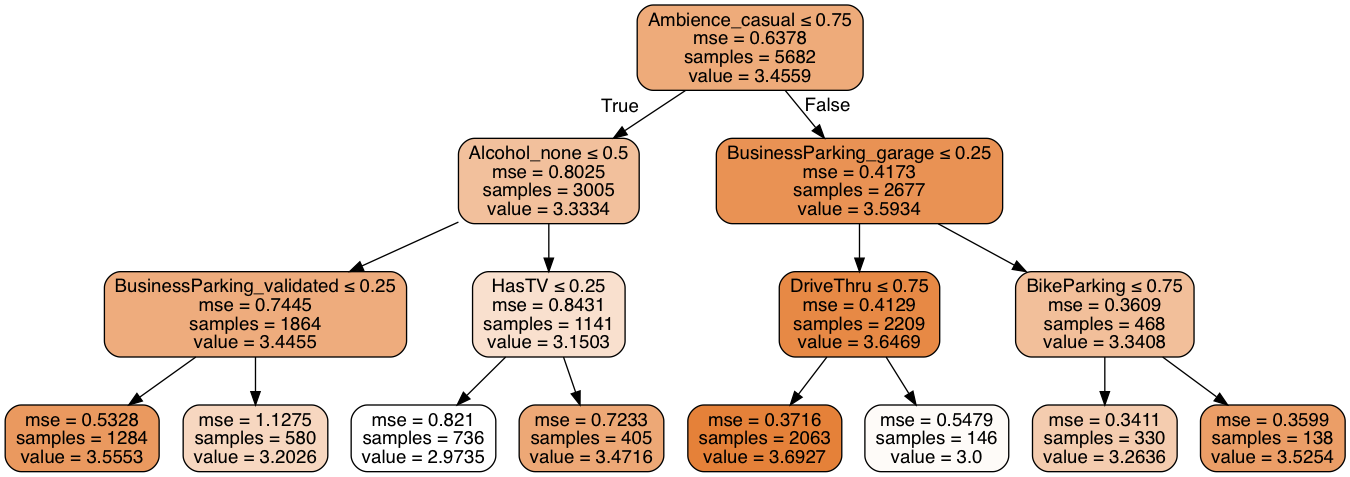

In [408]:
# Using Decision tree regressor with 10 fold cross validation.
feature_cols = [x.encode('utf-8') for x in mdf.columns.values]
X = mdf
y = rdf.stars

tree = DecisionTreeRegressor(max_depth=3, max_features=10) #Using max features of 10 just to start with
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
cross_val_scores = cross_val_score(tree, X, y, scoring='neg_mean_squared_error', cv=kfold)
print '10-fold RMSEs:'
print [np.sqrt(-x) for x in cross_val_scores]
print 'Mean of Cross Validated RMSE values:'
print np.sqrt(-np.mean(cross_val_scores))  # RMSE is the sqrt of the avg of MSEs
print 'Std of Cross Validated RMSE values:'
print np.std(cross_val_scores)

# visualize the tree
tree.fit(X, y)
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                    feature_names=feature_cols,  
                    filled=True, rounded=True,  
                    special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Clearly,the model started with casual ambience attribute to perform the 1st split at the root node. The next splitting happened using Alcohol_none(No Alcohol) and BusinessParking_garage(parking garage) attributes so on and so forth...

Decision tree is giving mean RMSE of 0.762905833724 which is higher than RidgeCV's value 0.724039259213.So, let's compare different modeling approaches and put all the things together. 

In [410]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor

# GridSearch to see if optimizing the parameters will improve (lower) the RMSE
reg_models = [('LinReg', LinearRegression(),{'normalize': [True, False]}),
              ('DecTreeReg', DecisionTreeRegressor(), {'max_depth': range(2, 10, 2), 'max_features': [0.25, 0.5, 0.75, 1.0]}),
              ('Lasso', Lasso(), {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}),
              ('Ridge', Ridge(), {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}),
              ('ElasticNet', ElasticNet(), {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}),
('RandomForestReg',RandomForestRegressor(),{'max_depth':range(2,10,2),'n_estimators':range(10,80,10),'max_features':[0.25, 0.5, 0.75, 1.0]})]
              
             

names = []
params = []
results = []
for name, model, param in reg_models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    reg_grid = GridSearchCV(model, param, cv=kfold, scoring='neg_mean_squared_error')
    reg_grid.fit(X, y)
    # just keep the results using the best parameters
    best_model = reg_grid.best_estimator_
    names.append(name)
    params.append(reg_grid.best_params_)
    results.append(np.sqrt(-reg_grid.best_score_))  # convert to RMSE

result_df = pd.DataFrame({'models': names, 'results': results})
result_df.columns = ['models', 'RMSE']
result_df.sort_values(by='RMSE', ascending=False, inplace=True)
print result_df

            models          RMSE
0           LinReg  2.087341e+08
2            Lasso  7.987966e-01
4       ElasticNet  7.848264e-01
3            Ridge  7.247431e-01
1       DecTreeReg  7.225666e-01
5  RandomForestReg  6.915623e-01


In [33]:
# Plot to compare the RMSE values of above results
rmsedata = [go.Bar(
            x=result_df['models'],
            y=result_df['RMSE']
            #x = ['LinReg','Lasso','ElasticNet','Ridge','DecTreeReg','RandomForestReg'],
            #y = [2.087341e+08,7.987966e-01,7.848264e-01,7.247431e-01,7.225666e-01,6.915623e-01]
    )]

layout = go.Layout(
    xaxis=dict(
        title='Models'  
       
    ),
    yaxis=dict(
        title='RMSE'
            )
)
fig = go.Figure(data=rmsedata, layout=layout)
py.iplot(fig, filename='basic-bar1')

Comparing various linear and non linear models is giving the lowest RMSE with Random Forest Regressor which is nothing but an ensemble of mulitple decision trees running in parallel and where each decision tree is working on a random subset of features. The cumulative results of all the decision trees is the final result of random forest regression.

The next step should be to see if we can optimize this Random Forest model and achievce a better RMSE.

In [ ]:
# Hyper parameter tuning to optimize random forest model

# parameters
param =[{'max_depth':range(10,20,2),'n_estimators':range(80,200,10),'max_features':[0.25, 0.5, 0.75, 1.0]}]
model = RandomForestRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
reg_grid = GridSearchCV(model, param, cv=kfold, scoring='neg_mean_squared_error') #GridsearchCV
# fit the model
reg_grid.fit(X,y)

# best model , best parameters, and best score
best_model = reg_grid.best_estimator_
best_parameters = reg_grid.best_params_
best_score = np.sqrt(-reg_grid.best_score_)

In [360]:
print "The Best model :", best_model
print "The Best parameters for the model :", best_parameters
print "The Best mean RMSE score : ", best_score

The Best model : RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features=0.25, max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=130, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
The Best parameters for the model : {'max_features': 0.25, 'n_estimators': 130, 'max_depth': 14}
The Best mean RMSE score :  0.682835499687


In [351]:
#Collect the feature importances in a pandas dataframe
feature_importance = best_model.feature_importances_
attribs = X.columns
temp=pd.DataFrame(sorted(zip(feature_importance, attribs), reverse=True))
temp.columns =['importance','feature']


In [352]:
temp

,importance,feature
0,1.075192e-01,DriveThru
1,5.284124e-02,Caters
2,4.176765e-02,HasTV
3,4.083672e-02,BikeParking
4,3.575983e-02,BusinessParking_lot
5,3.498474e-02,RestaurantsReservations
6,3.395361e-02,RestaurantsPriceRange2
7,3.355649e-02,WheelchairAccessible
8,2.729493e-02,OutdoorSeating
9,2.719877e-02,RestaurantsTableService


In [359]:
# Plotting the feature importance values
featuredata1 = [go.Bar(
            y=temp['importance'],
            x=temp['feature'],
           
    )]
'''
layout = go.Layout(
    xaxis=dict(
        title='Models'  
       
    ),
    yaxis=dict(
        title='RMSE'
            )
)
'''
fig1 = go.Figure(data=featuredata1)
py.iplot(fig1, filename='basic-bar7')

### Conclusion:

So, from the above optimization results, it is obvious that Random forest gives the lowest RMSE value of 0.682835499687 with 25% of the total no. features, an ensemble of 130 decision trees and maximum depth of 14. 

The feature importance graph represents the features in the descending order of their contribution in decreasing the RMSE. It is worth noticing the attributes with high feature importance like whether a restaurant has drive thru, whether it provides catering servies, whether it has TV, bike parking, restaurant resevations etc.... Clearly it seems intuitive that these kind of services will encourage customers to give higher star ratings. 

This type of analysis may serve as a valuable tool for restaurant business owners as it may help them improve upon the quality of their services to increase their star ratings thereby increasing their patrons and their net profits.

Further, the analysis performed in this journal entry was narrowed down to Vegas city and for restaurant business types. Extending this project on other business categories will give a bigger picture enabling us to understand the kind of attributes/features important for a particular business type's success.

Moreover, mining the text reviews and tips data from yelp to conduct sentiment analysis(using natural language processing techniques) is another very intresting area that I would like to explore in future.